<a id='top'></a>

# CSCI 3202, Spring 2018
# Assignment 2
# Due: Monday 12 February 2018 by 12:00 PM

<br>

### Your name: Brennon Lee

<br>

**Note:** Some helper functions and unit tests are defined at [the bottom of this notebook](#helpers)

Shortcuts:  [top](#top) || [1](#p1) | [1a](#p1a) | [1b](#p1b) | [1c](#p1c) | [1d](#p1d) | [1e](#p1e) | [1f](#p1f) || [2](#p2) | [2a](#p2a) | [2b](#p2b) | [2c](#p2c) || [3](#p3) | [3a](#p3a) | [3b](#p3b) | [3c](#p3c) || [4](#p4) | [4a](#p4a) | [4b](#p4b) | [4c](#p4c) | [4d](#p4d) | [4e](#p4e) || [helpers](#helpers)


---

<img src="https://static.rogerebert.com/uploads/movie/movie_poster/escape-from-la-1996/large_edJzJali1V5PS7dCMyLt8cPf3DG.jpg" alt="Drawing" style="width: 250px;"/>


<a id='p1'></a>[top](#top)

## Problem 1

### Escape from Chicago

It is the year 2030 and a freak earthquake has caused Chicago to break off from the mainland of Illinois. It has drifted out into Lake Michigan and is now used as a penal colony for the United States' worst criminals.  Snake Plisskin, world-famous tough guy and amateur sea lion enthusiast, must travel from Chicago to New York to find the antidote to the *Plutoxin 7 poison* that he and many other Chicagoans have been infected with.

Below are crude graphs representing the northeastern United States.  The graph on the left, **map_distances**, represents the step costs between two states on the graph (cities) using the distance between the two cities along major highways.  On the right, **map_times** represents the step costs using estimated travel time (at 5 PM on a Friday, east coast time).  These graphs are defined in the helper routines at the bottom of the notebook.

If you take a look at those graphss, you will notice that for brevity's sake, we will use **lowercase** abbreviations for each city, consisting of the **first 3 letters** of the city's name.  So Providence is represented by the state 'pro', for example.

**map_distances**          |  **map_times**
:-------------------------:|:-------------------------:
<img src="http://drive.google.com/uc?export=view&id=1j6Kam3F7ET-aIzT-6KMxaW7D7r8WAOME" alt="Drawing" style="width: 550px;"/>  | <img src="http://drive.google.com/uc?export=view&id=1rI5w8CuWOS9reMIewc2IDBp_Z3pSUu1H" alt="Drawing" style="width: 550px;"/>

<a id='p1a'></a>
### (1a)

#### Breadth-first search

Implement a function **breadth_first(start, goal, state_graph, return_cost)** to search the state space (and step costs) defined by **state_graph** using breadth-first search:
* **start**: initial state (e.g., 'ind')
* **end**: goal state (e.g., 'bos')
* **state_graph**: the dictionary defining the step costs (e.g., `map_distances`)
* **return_cost**: logical input representing whether or not to return the solution path cost
  * If **True**, then the output should be a tuple where the first value is the list representing the solution path and the second value is the path cost
  * If **False**, then the only output is the solution path list object

Note that in the helper functions, two useful routines for obtaining your solution path are provided (and can be used for all the search algorithms):
  * **path(previous, s)**: returns a list representing a path to state **s**, where **previous** is a dictionary that maps predecessors (keys) to successors (values)
  * **pathcost(path, step_costs)**: adds up the step costs defined by the **step_costs** graph (e.g., `map_distances`) along the list of states **path**

In [5]:
def breadth_first(start, goal, state_graph, return_cost):
    explored = {}
    frontier = deque()
    
    explored[start] = (None)
    frontier.append(start)
 
    while len(frontier):
        parent = frontier.popleft()
        if (parent == goal):
            goalPath = path(explored, goal)
            return (goalPath, pathcost(goalPath, state_graph)) if return_cost else goalPath
        for child in state_graph[parent]:
            if child in explored:
                continue
            if child not in explored:
                frontier.append(child)
                explored[child] = parent 
    return
    
    

#### Unit test: BFS

In [6]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem1("test_bfs"))
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

<a id='p1b'></a>
### (1b)

#### Depth-first search

Implement a function **depth_first(start, goal, state_graph, return_cost)** to search the state space (and step costs) defined by **state_graph** using depth-first search:
* **start**: initial state (e.g., 'ind')
* **end**: goal state (e.g., 'bos')
* **state_graph**: the dictionary defining the step costs (e.g., `map_distances`)
* **return_cost**: logical input representing whether or not to return the solution path cost
    * If **True**, then the output should be a tuple where the first value is the list representing the solution path and the second value is the path cost
    * If **False**, then the only output is the solution path list object

In [7]:
def depth_first(start, goal, state_graph, return_cost):
    explored = {}
    frontier = deque()
    
    explored[start] = (None)
    frontier.append(start)
    while len(frontier):
        parent = frontier.pop()
        if (parent == goal):
            goalPath = path(explored, goal)
            return (goalPath, pathcost(goalPath, state_graph)) if return_cost else goalPath
        for child in state_graph[parent]:
            if child in explored:
                continue
            if child not in explored:
                frontier.append(child)
                explored[child] = parent
    return

#### Unit test: DFS

In [8]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem1("test_dfs"))
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

<a id='p1c'></a>
### (1c)

#### Uniform-cost search

First, let's create our own `Frontier_PQ` class to represent the frontier (priority queue) for uniform-cost search.  Note that the `heapq` package is imported in the helpers at the bottom of this notebook; you may find that package useful.  You could also use the `Queue` package.  Your implementation of the uniform-cost search frontier should adhere to these specifications:
* Instantiation arguments: 
  * **Frontier_PQ(start, cost)**
  * **start** is the initial state (e.g., **start**='chi')
  * **cost** is the initial path cost (what should it be for the initial state?)
* Instantiation attributes/methods:
  * **states**: maintains a dictionary of states on the frontier, along with the _minimum_ path cost to arrive at them
  * **q**: a list of (cost, state) tuples, representing the elements on the frontier; should be treated as a priority queue (in contrast to the **states** dictionary, which is meant to keep track of the lowest-cost to each state)
  * appropriately initialize the starting state and cost
* Methods to implement:
  * **add(state, cost)**: add the (cost, state) tuple to the frontier
  * **pop()**: return the lowest-cost (cost, state) tuple, and pop it off the frontier
  * **replace(state, cost)**: if you find a lower-cost path to a state that's already on the frontier, it should be replaced using this method.
  
Note that there is some redundancy between the information stored in **states** and **q**. I only suggest to code it in this way because I think it's the most straightforward way to get something working. You could reduce the storage requirements by eliminating the redundancy, but it increases the time complexity because of the function calls needed to manipulate your priority queue to check for states (since that isn't how the frontier queue is ordered).

In [9]:
class Frontier_PQ:
    def __init__(self, start, cost):
        self.start = start
        self.cost = cost
        self.states= {}# dic of states on fronter w/ min path cost to arrive
        self.q = [] # tuple list of (cost, state)
        
    def add(self, state, cost):
        self.states[state] = cost
        heapq.heappush(self.q, (cost, state))
        return 
    
    def pop(self):
        return heapq.heappop(self.q)
    
    def replace(self, state, cost):
        del self.states[state]
        self.states[state] = cost
        return 
    


Now, actually implement a function to search using `uniform_cost` search, called as **uniform_cost(start, goal, state_graph, return_cost)**:
* **start**: initial state
* **goal**: goal state
* **state_graph**: graph representing the connectivity and step costs of the state space (e.g., **map_distances** or **map_times** below)
* **return_cost**: logical input representing whether or not to return the solution path cost
  * If **True**, then the output should be a tuple where the first value is the list representing the solution path and the second value is the path cost
  * If **False**, then the only output is the solution path list object

In [10]:
def uniform_cost(start, goal, state_graph, return_cost):
    explored = {}
    frontier = Frontier_PQ(start, 0)
    
    explored[start] = (None)
    frontier.add(start, 0)

    while frontier.q:
        
        parent = frontier.pop()[1]
        
        if (parent == goal):
            goalPath = path(explored, goal)
            return (goalPath, pathcost(goalPath, state_graph)) if return_cost else goalPath
        
        for child in state_graph[parent]:
            if child in frontier.states:
                tempPath = {}
                tempPath[parent] = (None)
                tempPath[child] = parent
                tempPathCost = pathcost(path(tempPath, child), state_graph)

                if (frontier.states[parent] + tempPathCost < frontier.states[child]):
                    frontier.replace(child, tempPathCost + frontier.states[parent])
                    explored[child] = parent

            if child not in frontier.states:
                explored[child] = parent
                childPath = path(explored, child)
                childCost = pathcost(childPath, state_graph)
                frontier.add(child, childCost)
    return

#### Unit test: uniform-cost search

In [11]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem1("test_ucs"))
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

<a id='p1d'></a>
### (1d)

In the code cell below, use a few **print** statements to showcase the output of each of your three search algorithms defined above (in **1a**, **1b** and **1c**) to find routes for Snake to travel from Chicago to New York, with path costs defined by the distance between cities.

Then, in the markdown cell below your code cell, write a few sentences:
* Which algorithm yields the shortest path?
* Why does this not surprise you?

In [12]:
print(breadth_first('chi', 'new', map_distances, True))
print(depth_first('chi', 'new', map_distances, True))
print(uniform_cost('chi', 'new', map_distances, True))

(['chi', 'det', 'buf', 'syr', 'new'], 943)
(['chi', 'ind', 'col', 'pit', 'phi', 'new'], 945)
(['chi', 'cle', 'pit', 'phi', 'new'], 881)


#### The shortest path was found by none other than our UCS function. This is not surprise since we have a priority queue that is keeping track of the shortest routes as we are navigating the graph.

<a id='p1e'></a>
### (1e)

The Plutoxin 7 poison (which Snake has been infected with) will cause Snake's central nervous system to implode after exactly 940 minutes.

Will any of the paths found in **(1d)** get Snake to New York alive?  Show your work! Snake's life hangs in the balance.

#### breadth_first = 0 + 280 + 270 + 145 + 260 = 955 min
#### depth_first = 0 + 200 + 175 + 185 + 305 + 150 = 1015 min
#### uniform_cost = 0 + 345 + 145 + 305 + 150 = 945 min

#### Unfortunately, none of the paths from 1d will get Snake to New York in time

<a id='p1f'></a>
### (1f)

Since time is a factor, Snake ought to optimize his route from Chicago to New York to minimize the total time required. Because Snake is a renaissance man, he knows some pretty slick search algorithms.  But because he's infected with deadly poison, Snake just isn't up to the task of implementing them - his code is full of bugs and he keeps sneezing all over his monitor!  Let's help him out, shall we?

In the code cell below, find the shortest path from Chicago to New York as measured by total time taken, and display the result using a **print** statement

In the markdown cell below the code cell, write a couple of sentences:
* Why did you choose the search algorithm and state space graph that you chose?
* Would the solution path found by the other algorithms (the ones you didn't use in your function call) change if you tried to optimize based on time as opposed to distance (i.e., used **map_times** as opposed to **map_distances**)? Why or why not?
* **Most importantly:**  will Snake get to New York in time to receive the Plutoxin 7 antidote? This answer should be justified by your code output.

In [13]:
# print('BFS time: ',breadth_first('chi', 'new', map_times, True))
# print('DFS time: ',depth_first('chi', 'new', map_times, True))
print('UCS time: ',uniform_cost('chi', 'new', map_times, True))

UCS time:  (['chi', 'cle', 'buf', 'syr', 'new'], 935)


#### I chose to use the UCS algorithm we coded in part 1c because this algorithm will find the shortest path since it uses a priority queue that is constantly updating the shortests paths.

#### The solution path found by Breadth_first or Depth_first does not beat the UCS algorithm and in fact, they give us the exact paths and times we calcualted above in parts E and D.

#### If Snake uses UCS, then he will make it in time to New York to get the antidote.

<br>

---

<a id='p2'></a>[top](#top)
## Problem 2

### An uncertain world

In the fabled "real world", the step costs in terms of travel time between connected cities are estimates; there is **uncertainty** in these estimates.  **For the rest of this problem** we will only refer to the step costs in the **map_times** graph as the step costs (since the distances between two cities have pretty much no uncertainty, they aren't particularly interesting here).  In this problem, we will fit some probability distributions to the step costs, then we will use **Monte Carlo** sampling to estimate the probability that Snake will arrive in New York in time to take the Plutoxin 7 antidote.

First, let's think about what these probability distributions should look like in the first place.

The step costs represent the time it takes to drive between two cities. These quantities should be nonnegative, have a peak near some central value, and have no theoretical upper bound. Two distributions come to mind, although there are other defensible choices:  lognormal and gamma. For this problem, we will use lognormal distributions.

With step cost between two given cities distributed lognormally, this means that the distribution of the natural logarithm of the step costs is normally distributed with mean $\mu$ and standard deviation $\sigma$.  It is often more natural to think of the *step cost* median $m = \exp(\mu)$, since it is in the same terms (units) as the actual step cost distribution that we care about. $m$ or $\mu$, together with a shape parameter $\sigma$, fully define the lognormal distribution for any given step cost in our graph.

The next second question is how should we choose $m$ and $\sigma$ for a given step cost between states?  A natural choice for $m$ is the fixed step costs in **map_times**, since those are central estimates already.

Recall that for a normal distribution there is a rule-of-thumb (arising from the Central Limit Theorem) that says that if you draw a large sample from this distribution, about 68% of the samples will come from the interval $[\mu - \sigma, \mu + \sigma]$, where $\mu$ and $\sigma$ and the mean and standard deviation of the normal distribution.  There is a similar rule for the lognormal distribution.  This rule is that about 68% of the samples drawn from a lognormal distribution with parameters $m$ and $s=\exp{(\sigma)}$ will come from the interval $[m/s, ms]$.

Let's somewhat arbitrarily assume that the uncertainty varies proportionally with the central estimate of the step cost. This should make a bit of sense, because you are generally more uncertain about your arrival time for longer trips. Let's suppose $s = 1.1$, which assumes (roughly) a $\pm$10% relative error in our central estimate $m$. Note that $s$ will remain the same for all of the steps between states, but $m$ will depend on which step we are looking at.

Phew!  Enough chit chat.  Let's do some science!

<a id='p2a'></a>
### (2a)

For the very first step along Snake's minimum-time route from Chicago to New York... 
* set $m$ equal to the central estimate of this step cost,
* set $\sigma$ equal to $\log{s} = \log{1.1}$,
* sample 10,000 step costs for this leg of the journey,
* and store the resulting sample of step costs in a list.

Plot a histogram of the sampling of step costs. Be sure to **label your axes appropriately, including units**. Also, plot the histogram **normalized** to represent a probability distribution, as opposed to a frequency plot.

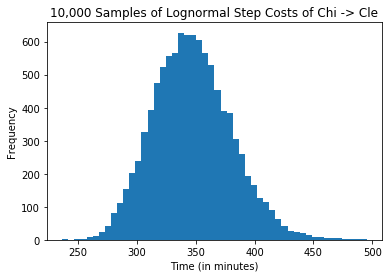

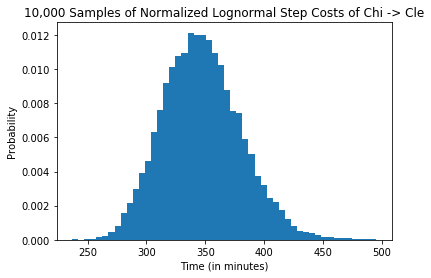

In [14]:
m = 345 # First step of Chi -> Cle
s = 1.1
sigma = np.log(s)
mu = np.log(m)
samples = np.random.lognormal(mu, sigma, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(samples, 50)
plt.title('10,000 Samples of Lognormal Step Costs of Chi -> Cle')
plt.xlabel('Time (in minutes)')
plt.ylabel('Frequency')
fig.canvas.draw()
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
n, bins, rectangles = ax2.hist(samples, 50, normed=True)
plt.title('10,000 Samples of Normalized Lognormal Step Costs of Chi -> Cle')
plt.xlabel('Time (in minutes)')
plt.ylabel('Probability')
fig.canvas.draw()
plt.show()

<a id='p2b'></a>
### (2b)

Now we need to sample the uncertainty in the remaining steps along the path from Chicago to New York.  It will be easier to simply redo the work from **2a**, but in a more efficient manner. We can be a bit more clever with the foresight that what we *really* want to do is to draw a sample from the distribution of each the step along the path and add them up to obtain a stochastic realization of the total path cost. But it is wildly inefficient to draw once from the distribution for Step 1, then once from Step 2, and so on to the last Step, and then circle back to draw a second time from Step 1, and then a second time from Step 2, and so on ... thousands of times over.

So instead...
* use a `numpy` array
* use zero or one `for` loop
* draw 10,000 samples for the time needed for each leg of the journey
* obtain a list or array that represents 10,000 samples from the distribution of total path costs

Plot a histogram of the sampling of total path costs. Be sure to **label your axes appropriately, including units**, and **normalize** the histogram.

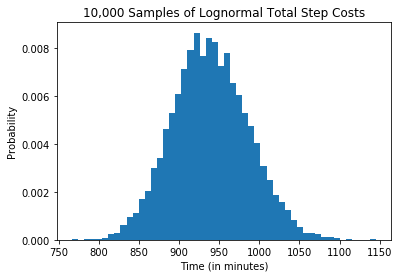

In [15]:
m = [345, 185, 145, 260] # Chi->Cle->Buf->Syr->New
s = 1.1
sigma = np.log(s)
samplesArray = []

for index,step in enumerate(m):
    mu = np.log(step)
    samples = np.random.lognormal(mu, sigma, 10000)
    samplesArray.append(samples)
    
totalCost = np.sum(samplesArray, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(totalCost, 50, normed=True)
plt.title('10,000 Samples of Lognormal Total Step Costs')
plt.xlabel('Time (in minutes)')
plt.ylabel('Probability')
fig.canvas.draw()
plt.show()

<a id='p2c'></a>
### (2c)

Estimate the probability that Snake makes it to New York alive, now that we have taken uncertainty into account.

In [16]:
total = len(totalCost)
count = 0
for i in totalCost:
    if i < 940:
        count+= 1
prob = count / total
print('Probability Snake makes it to New York is ' + str(prob*100) + '%')

Probability Snake makes it to New York is 51.9%


<br>

---

<a id='p3'></a>[top](#top)
## Problem 3

Consider this maze, where gray tiles represent walls and orange tiles represent open space where you can walk.

<img src="http://drive.google.com/uc?export=view&id=1bCT7aePAwB1t8ZdIboOqmhzMAQ_grKBZ" alt="Drawing" style="width: 200px;"/>

We can represent this maze using a binary `numpy` array as follows, where 1s represent walls and 0s represent open space:

In [17]:
maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
                 [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
                 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

**Very importantly**, note that the *first* row of the **maze** array corresponds to the *bottom* row of tiles in the figure.  This is a choice made carefully to reflect the fact that we are going to search for a solution path through this maze in *physical* space, so it is useful for our coordinate system to match Cartesian coordinates. This is in contrast to using the first row of the **maze** array to represent the top of the maze, which looks intuitive.

<a id='p3a'></a>
### (3a)

Write a function **maze_to_graph(maze)** that:
* takes as input a binary maze **maze**, stored as a `numpy` array, where 0 represents an open space and 1 represents a wall
* returns a graph dictionary in a similar style to **map_distances** and **map_times** (from Problem 1)
  * the keys are tuples giving the states (coordinate pairs) within the maze (e.g., (1,1) represents the lower-left open space, (2,1) represents the space **to the right** of (1,1), and (0,0) represents the lower-left corner, a wall location); thus, the coordinates within the maze are like Cartesian coordinates, and the x- and y-axes are the bottom and left walls of the maze, respectively
  * the values are themselves dictionaries, where the keys are other states within the maze and the values are the actions taken to move to that state
  * the actions are moves from the list ['N','S','E','W']

In [18]:
def maze_to_graph(maze):
    yValues = maze.shape[0]
    xValues = maze.shape[1]
    dictionary = {}
    for y in range(0, yValues):
        for x in range(0,xValues):
            if(maze[y][x] == 0.0):
                
                dictionary[(x,y)] = {}
                
                if (maze[y+1][x] == 0.0): #north
                    dictionary[(x,y)][(x,y+1)] = 'N'
                    
                if (maze[y-1][x] == 0.0): #south
                    dictionary[(x,y)][(x,y-1)] = 'S'
                    
                if (maze[y][x+1] == 0.0): #west
                    dictionary[(x,y)][(x+1,y)] = 'E'
                    
                if (maze[y][x-1] == 0.0): #east
                    dictionary[(x,y)][(x-1,y)] = 'W'
    return(dictionary)

#### Unit test: maze-to-graph

In [19]:
# Run unit tests
tests = Tests_Problem3()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

<a id='p3b'></a>
### (3b)

Use you **maze_to_graph** function and **depth-first search** to solve the maze defined above.  A simple 'print' statement of the path your codes find and its length suffices.
* The initial state is (1,1)
* The goal state is (10,10)

Then, use your **breadth-first search** function to solve the maze; provide the solution path and its length.

If your codes are sufficiently general, the output from **maze_to_graph** should be suitable to be fed straight into your search routines.

In [20]:
graph = maze_to_graph(maze)
bfsPath = breadth_first((1,1), (10,10), graph, False)
print('BFS Path: ', bfsPath)
print('BFS Length: ', len(bfsPath))

dfsPath = depth_first((1,1), (10,10), graph, False)
print('\nDFS Path: ', dfsPath)
print('DFS Length: ', len(dfsPath))


BFS Path:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (10, 9), (10, 10)]
BFS Length:  19

DFS Path:  [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 10), (3, 10), (3, 9), (4, 9), (4, 8), (4, 7), (5, 7), (6, 7), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (10, 9), (10, 10)]
DFS Length:  39


<a id='p3c'></a>
### (3c)

Write a function **plot_maze(maze, path)** that takes as input a binary `numpy` array **maze** (1s represent walls, 0s represent open space) and a solution **path**, and plots the two together.
* **maze**: a maze represented as a binary `numpy` array, as above
* **path**: a solution path found using your search algorithms above. **path** should be consistent with the output from the **path** function below in the helpers (a list of states).  You may find it useful to provide a default of `None` for **path**, so that you can use your function to just plot a maze that you haven't solved yet.

Then, use your **plot_maze** function to plot the maze defined above, along with the solution path found by **depth-first search**.


<br>

**Potentially useful:** 

[1] In the helpers, you will notice that there are two packages imported:
  * `import matplotlib.pyplot as plt`
  * `from matplotlib import colors`

`pyplot` and `colors` may be potentially useful to you for generating a pretty plot and generating a colormap for your walls/open spaces in the maze, respectively.  You do not need to use them, but I wanted to provide this nudge for folks who maybe have not done much/any plotting in Python before.

[2] Also, [Color Oracle](http://colororacle.org/) is a useful utility for making colorblind-friendly plots. If you ever plan to show another human being a figure that you have generated, this is nice practice. Check it out!

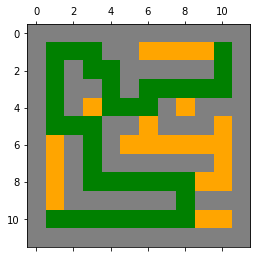

In [21]:
maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
                 [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
                 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
                 [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
                 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
                 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

def plot_maze(maze, Path=None):
    graph = maze_to_graph(maze)
    cmap = colors.ListedColormap(['orange', 'grey', 'green'])
    
    for (i,j) in Path:
        maze[j][i] = 2   
    
    plt.matshow(np.flip(maze, axis=0), cmap=cmap)
    return

plot_maze(maze, dfsPath)

<br>

---

<a id='p4'></a>[top](#top)
## Problem 4

<img src="https://cdn.cinnabon.com/-/media/cinnabon/menu/minibon_332x255.jpg" alt="Drawing" style="width: 200px;"/>

### The Cinnabonmageddon Loss Function

To motivate this problem, consider the following situation.  Suppose you need to drive your friend Dan to the airport.  Let $d$ represent your decision, namely, how long you and Dan allow for the trip to the airport.  Let $x$ represent the amount of time it actually takes you to drive to the airport. Common experience suggests that $x$ is uncertain, and we would like to account for this uncertainty in our decision about when to leave.

Also, let $L(d,x)$ represent the loss function when decision $d$ is made in state $x$. 

So, for example, $d=180$ minutes if we leave 3 hours before Dan wants to arrive at the airport, and $x=45$ minutes would represent the state-of-the-world (SOW) where it actually takes you 45 minutes to drive there. And $L(180,45)$ is the resulting loss.  We feel this loss because we have most likely arrived at the airport about 2 hours ahead of schedule and will now sit and eat Cinnabon and regret our decisions - *all* of our decisions.

For the loss function, let's use the classical **plane-catching loss function**, also known as the **catastrophic** - or in the case of airports, **Cinnabonmageddon** - **loss function**:

$$L(d,x) = \left\{
        \begin{array}{ll}
             k(d-x) & \quad d \ge x \\
             k(d-x)+M & \quad d < x
        \end{array}
    \right.$$
    
Here, $k$ and $M$ are positive constants, and we assume that $M > k(d-x)$ for any situations we care about. $M$ represents the catastrophic increase in loss from missing our plane, and since we have several hours to kill in the airport before the next flight, we eat Cinnabon (which only compounds the loss we suffer).

As we saw in class, the expected value of perfect information (EVPI) and the expected value of including uncertainty (EVIU) in your decision regarding when to leave for the airport depend on two subjective judgments:
1. the functional form of the loss function, $L(d,x)$, and
1. the prior probability density function (pdf), $f(x)$, over all possible SOW, $x$.

This problem is meant partially to give you experience working in Markdown, and also partially meant to give you experience getting used to the mechanics of manipulating tricky loss functions, and obtaining useful results regarding the theoretical value of including or reducing uncertainty in our probabilistic estimates, which in turn, affects the decisions we or our robot overlords will make.

<a id='p4a'></a>
### (4a)

Show that the Bayes' Decision ($d_B$, the decision that minimizes the expected loss) for the plane-catching problem defined here satisfies the equation:  $$\ f(d_B) = \dfrac{k}{M}$$

Do all of your work in Markdown below, with LaTeX formatting for equations.

**Hint:**  Recall that if $F(x)$ is the cumulative density function corresponding to the probability density function $f(x)$, then ${\displaystyle F(x) = \int_{-\infty}^x f(y)\ dy}$ and $f(x) = \dfrac{d}{dx} F(x)$

expected value of loss function & minmizre it

##### To start, first we need to take the Expected Value of our Loss function, then we will take it's derivative and set it equal to zero in order to minimize it.

$$E[L(d,x] = \int_{-\infty}^{\infty} L(d,x) \cdot f(x) dx$$
$$= \int_{-\infty}^{d} k(d-x) f(x) dx + \int_{d}^{\infty} [k(d-x) + M] \cdot f(x) dx$$
$$= \int_{-\infty}^{d} kdf(x) - kxf(x) dx + \int_{d}^{\infty} kdf(x) - kxf(x) + Mf(x) dx$$
$$=  kd\int_{-\infty}^{d}f(x) dx - k\int_{-\infty}^{d}xf(x) dx + kd\int_{d}^{\infty}f(x) dx - k\int_{d}^{\infty} xf(x) dx + M\int_{d}^{\infty}f(x) dx$$
##### Notice that $\int_{-\infty}^{\infty}f(x) dx = 1$ by defintion of a PDF. And we can combine some like terms in our equation above:
$$=  kd\int_{-\infty}^{\infty}f(x) dx - k\int_{-\infty}^{d}xf(x) dx - k\int_{d}^{\infty} xf(x) dx + M\int_{d}^{\infty}f(x) dx$$

##### Also notice that $E[x] = \int_{-\infty}^{\infty} x \cdot f(x) dx$. So we can combine yet more integrals from above.
$$=  kd\int_{-\infty}^{\infty}f(x) dx - k\int_{-\infty}^{\infty}xf(x) dx + M\int_{d}^{\infty}f(x) dx$$
##### Simplifying further yields:
$$=  kd \cdot (1) - k \cdot E[x] + M\int_{d}^{\infty}f(x) dx$$
##### Now we take into account that $F(d) + \int_{d}^{\infty} f(x)dx = \int_{-\infty}^{d}f(x)dx + \int_{d}^{\infty} f(x)dx = 1$. So substituting $1 - F(d)$ for $\int_{d}^{\infty} f(x)dx$ gives:
$$=  kd  - kE[x] + M(1 - F(d))$$
##### Taking derivative with respect to $d$ and setting equal to zero:
$$k - Mf(d) = 0$$

$$\boxed{\frac{k}{M} = f(d)}$$


<a id='p4b'></a>
### (4b)

To proceed any further, we need a prior distribution $f(x)$.  Let's again use a lognormal distribution.  The probability density function for a lognormal distribution looks like:

$$f(x) = f(x~|~\mu, \sigma) = \dfrac{1}{\sqrt{2\pi}\ \sigma\ x}\ \exp{\left[-\dfrac{(\log{(x)} - \mu)^2}{2\sigma^2}\right]}$$

where $\mu$ and $\sigma$ are the parameters discussed in Problem 2. For brevity's sake, we will leave off the conditioning of this probability density function on $\mu$ and $\sigma$.

If we combine this prior distribution with our constraint for the Bayes' Decision from **4a**, we find:

$$f(d_B) = \dfrac{1}{\sqrt{2\pi}\ \sigma\ d_B}\ \exp{\left[-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}\right]} \stackrel{\heartsuit}{=} \dfrac{k}{M}$$

Starting from the equation above, show that the Bayes' Decision $d_B$ satisfies the following equation:

$$\log{d_B} = \mu - \sigma^2 \pm \sigma \sqrt{\sigma^2 - 2\mu - 2\log{\left(\dfrac{\sqrt{2\pi}\sigma k}{M}\right)}}$$

**Hint:**  You will need to use the quadratic formula (that's where the $\pm$ comes into play).

##### Starting with this equation: 
$$f(d_B) = \dfrac{1}{\sqrt{2\pi}\ \sigma\ d_B}\ \exp{\left[-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}\right]} \stackrel{\heartsuit}{=} \dfrac{k}{M}$$

$$\exp{\left[-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}\right]} = \dfrac{k\sqrt{2\pi}\ \sigma\ d_B}{M}$$

$$-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}= \log{(\dfrac{k\sqrt{2\pi}\ \sigma\ d_B}{M})}$$

$$-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}= \log{(k\sqrt{2\pi}\ \sigma\ d_B)} - \log{(M)}$$

$$-\dfrac{(\log{(d_B)} - \mu)^2}{2\sigma^2}= \log{(k\sqrt{2\pi}\ \sigma)} +  \log{(d_B)} - \log{(M)}$$

$$(\log{(d_B)} - \mu)^2= 2\sigma^2 \log{(M)} - 2\sigma^2 \log{(k\sqrt{2\pi}\ \sigma)} -  2\sigma^2 \log{(d_B)}$$

$$\log{(d_B)^2} - 2\mu\log{(d_b)}+ \mu^2= 2\sigma^2 \log{(M)} - 2\sigma^2 \log{(k\sqrt{2\pi}\ \sigma)} -  2\sigma^2 \log{(d_B)}$$

$$\log{(d_B)^2} - 2\mu\log{(d_b)} +  2\sigma^2 \log{(d_B)} + \mu^2= 2\sigma^2 \log{(M)} - 2\sigma^2 \log{(k\sqrt{2\pi}\ \sigma)}$$


$$\log{(d_B)^2} +  (2\sigma^2 - 2\mu) \log{(d_b)} + \mu^2= 2\sigma^2 \log{(M)} - 2\sigma^2 \log{(k\sqrt{2\pi}\ \sigma)}$$

$$\log{(d_B)^2} +  (2\sigma^2 - 2\mu) \log{(d_b)} + \mu^2= 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})}$$


$$\log{(d_B)^2} +  (2\sigma^2 - 2\mu) \log{(d_b)} - 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} + \mu^2 = 0$$

##### Note that this setup is looking very much like the quadratic formula where $x=\log{(d_B)},\ a=1,\ b=2\sigma^2 - 2\mu,$ and $c=- 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} + \mu^2 $

##### Solving for  $\log{(d_B)}$ gives us:
$$\log{(d_B)} = \dfrac{-(2\sigma^2 - 2\mu)}{2} \pm \dfrac{\sqrt{(2\sigma^2 - 2\mu)^2 \ - 4 \cdot (- 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} + \mu^2) }}{2} $$

$$\log{(d_B)} =  \mu - \sigma^2 \pm \dfrac{\sqrt{(2\sigma^2 - 2\mu)^2 \ - 4 \cdot (- 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} + \mu^2) }}{2} $$

$$\log{(d_B)} =  \mu - \sigma^2 \pm \dfrac{\sqrt{(4\sigma^4 - 8\mu \sigma^2 + 4\mu^2) \ + 8\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} - 4\mu^2}}{2} $$

$$\log{(d_B)} =  \mu - \sigma^2 \pm \dfrac{2 \cdot \sqrt{\sigma^4 - 2\mu \sigma^2 + \mu^2 \ + 2\sigma^2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})} - \mu^2}}{2} $$


$$\log{(d_B)} =  \mu - \sigma^2 \pm \ \sqrt{\sigma^2 (\sigma^2 - 2\mu + 2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})})} $$

$$\log{(d_B)} =  \mu - \sigma^2 \pm \ \sigma \sqrt{\sigma^2 - 2\mu + 2 \log{(\frac{M}{k\sqrt{2\pi}\ \sigma})}} $$

##### And after doing some re-arranging, we finally arrive at:

$$ \boxed{\log{(d_B)} =  \mu - \sigma^2 \pm \ \sigma \sqrt{\sigma^2 - 2\mu - 2 \log{(\dfrac{\sqrt{2\pi}\ \sigma k}{M})}}}$$

<a id='p4c'></a>
### (4c)

Write a function **expected_loss(d, k, M, mu, sigma)** to calculate the expected loss with the following inputs:
* **d** is the decision that is made (i.e., how long you allow for travel to the airport)
* **k** and **M** are parameters from the loss function specification
* **mu** is the central tendency parameter from the lognormal prior distribution (**mu** = $\log{m}$ from Problem 2)
* **sigma** is the uncertainty parameter from the lognormal prior distribution (**sigma** = $\log{s}$ from Problem 2)
* return the expected loss using the catastrophic/plane-catching/Cinnabonmageddon loss function

Note that somewhere in your intermediate work for **4a**, you should have stumbled upon an expression for the expected loss under decision $d$ (since this is what you must minimize to find the Bayes' Decision).

$$=  kd  - kE[x] + M(1 - F(d))$$

In [22]:
from scipy.stats import lognorm

def expected_loss(d, k, M, mu, sigma):
    expectedLoss = k*(d - (np.exp(mu + ((1/2) * sigma**2)))) + M*(1 - lognorm.cdf(d,s=sigma, scale=np.exp(mu)))
    return expectedLoss

Use your **expected_loss** function to determine the Bayes' Decision, using these parameters:
* $k=1$
* $M=300$ (minutes)
* $\mu = \log{50}$
* $\sigma = \log{1.2}$  (reflecting that we have driven on I-70 near Denver before, and are therefore more uncertain about this travel time)

In [84]:
k = 1
M = 300
mu = np.log(50)
sigma = np.log(1.2)

logdBPlus = (mu - sigma**2) + (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M))) 
logdBMinus = (mu - sigma**2) - (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M)))
d = np.exp(logdBPlus), np.exp(logdBMinus)

loss1 = expected_loss(d[0], k, M, mu, sigma)
loss2 = expected_loss(d[1], k, M, mu, sigma)

loss = min(loss1, loss2)

whichD = d[0] if loss == loss1 else d[1]

print('\nWith given uncertainty log(1.2) Baye\'s decision of ' + str(whichD) + ' the expected loss is ' + str(loss) + '\n')


With given uncertainty log(1.2) Baye's decision of 73.24813567196803 the expected loss is 27.8456095424282



Suppose you are a bit more certain about how long it will take to get to the airport. You might represent this knowledge by reducing $\sigma$ to $\sigma=\log{1.1}$. What then would be the Bayes' Decision?

In [83]:
k = 1
M = 300
mu = np.log(50)
sigma = np.log(1.1)

logdBPlus = (mu - sigma**2) + (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M))) 
logdBMinus = (mu - sigma**2) - (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M)))
d = np.exp(logdBPlus), np.exp(logdBMinus)

loss1 = expected_loss(d[0], k, M, mu, sigma)
loss2 = expected_loss(d[1], k, M, mu, sigma)

loss = min(loss1, loss2)

whichD = d[0] if loss == loss1 else d[1]

print('\nWith given uncertainty log(1.1) Baye\'s decision of ' + str(whichD) + ' the expected loss is ' + str(loss) + '\n')


With given uncertainty log(1.1) Baye's decision of 63.12448188890182 the expected loss is 15.066344063138853



Write a sentence or two reflecting on the relationship between your uncertainty regarding travel time and the Bayes' Decision for how long to allow for the trip.

#### As the value of our uncertainty decreases, the value of Baye's Decision decreases and converges to a value of $50$. This makes sense since as our uncertainty goes down, our arrival time will converge to a specific departure time and our expected loss will $\rightarrow 0$.

<a id='p4d'></a>
### (4d)

#### EVIU and EVPI

Recall that the expected value of perfect information (EVPI) and the expected value of including uncertainty (EVIU) are:

$$\begin{align*}
  \text{EVPI} &= E_x[L(d_B, x)] - E_x[L(d_{pi}, x)] \\
  \text{EVIU} &= E_x[L(d_{iu}, x)] - E_x[L(d_{B}, x)] 
 \end{align*}$$

where $d_{iu}$ is the decision you would make ignoring uncertainty, $d_{pi}$ is the decision you would make if you had perfect information regarding the uncertain travel time $x$, and $d_B$ is the Bayes' Decision.

In **4c** you computed the Bayes' Decision ($d_B$) and its expected loss ($E_x[L(d_B,x)]$), and wrote a nice function for expected loss that we can simply plug in $d_{iu}$ and $d_{pi}$ into, and we will have everything we need to calculate EVPI and EVIU!

First, if we had perfect information, we would know exactly the value of $x$ and could make the decision $d_{pi}=x$.  So $L(d_{pi}, x)=0$, and EVPI reduces to

$$\text{EVPI} = E_x[L(d_B, x)]$$

Next, let's suppose that if we were to ignore uncertainty, we would decide to leave the expected amount of time for the journey to the airport.  Thus, we might take $d_{iu} = E_x[x]$.

Calculate the EVPI and the EVIU for the parameters given in **4c** (with the original $\sigma=\log{1.2}$). Note that there is a lovely closed form for the expected value of a lognormally distributed random variable.

In [102]:
k = 1
M = 300
mu = np.log(50)
sigma = np.log(1.2)

logdBPlus = (mu - sigma**2) + (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M))) 
logdBMinus = (mu - sigma**2) - (sigma * np.sqrt(sigma**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * sigma*k) / M)))

d = np.exp(logdBPlus), np.exp(logdBMinus)
d_iu = np.exp(mu + ((1/2) * sigma**2))

loss1 = expected_loss(d[0], k, M, mu, sigma)
loss2 = expected_loss(d[1], k, M, mu, sigma)

loss = min(loss1, loss2)

EVPI_LOSS = loss - 0 # Since we would 
EVIU_LOSS = expected_loss(d_iu, k, M, mu, sigma) - loss

print('EVPI = ' + str(EVPI_LOSS))
print('EVIU = ' + str(EVIU_LOSS))

EVPI = 27.8456095424282
EVIU = 111.25911637477134


<a id='p4e'></a>
### (4e)

#### How uncertain are we?

Our decisions hinge on how certain/uncertain we are about the world around us.  For this particular problem, our uncertain decision variable is how long it will take to drive to the airport.

Let's see how our estimates of the EVPI and EVIU vary, depending on how uncertain we are. Calculate EVIU and EVPI for a range of values of $\sigma$, the uncertainty parameter for the lognormal prior distribution (the first line given below provides which values for $\sigma$ you should use).

Then, plot the results.
* plot $\sigma$ along the x-axis
* plot EVIU and EVPI on the same y-axis
* include a legend pointing out which line is EVIU and which one is EVPI
* label your axes appropriately

Lastly, include a few sentences in a Markdown cell reflecting on what the shape of this plot tells you.  For example, how do the relative values of EVPI and EVIU change as your uncertainty $\sigma$ changes? Does the way in which increasing uncertainty affect EVIU and EVPI make sense?

In [107]:
sigma = np.log(np.arange(1, 3, 0.01))
k = 1
M = 300
mu = np.log(50)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


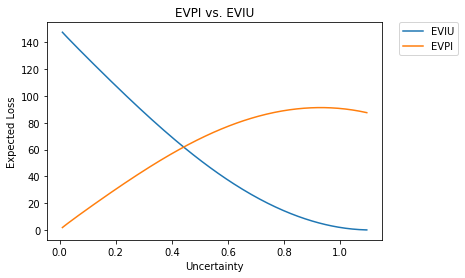

In [125]:
EVIU_VALS = []
EVPI_VALS = []

for s in sigma:
    logdBPlus = (mu - s**2) + (s * np.sqrt(s**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * s*k) / M))) 
    logdBMinus = (mu - s**2) - (s * np.sqrt(s**2 - (2*mu) - 2*np.log((np.sqrt(2*np.pi) * s*k) / M)))
    
    d = np.exp(logdBPlus), np.exp(logdBMinus)
    d_iu = np.exp(mu + ((1/2) * s**2))

    loss1 = expected_loss(d[0], k, M, mu, s)
    loss2 = expected_loss(d[1], k, M, mu, s)

    loss = min(loss1, loss2)
    
    EVPI_VALS.append(loss)
    
    val = expected_loss(d_iu, k, M, mu, s) - loss
    
    EVIU_VALS.append(val)
    
plt.plot(sigma, EVIU_VALS, label='EVIU')
plt.plot(sigma, EVPI_VALS, label='EVPI')
plt.xlabel('Uncertainty')
plt.ylabel('Expected Loss')
plt.title('EVPI vs. EVIU')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### As uncertainty increases, the expected loss of EVPI will increase. This makes sense because in the airport example, if we are more uncertain about how long it takes us to get there, we could end up arriving too early or too late for the plan which shows why our expected loss is greater.

##### For EVIU, this line represents our expected loss including uncertainty where $d_{IU} = E[d_{B}]$. As uncertainty increases, our EVIU deceases because we are subtracting the actual  loss from our expected loss of our expected time of departure. So for our airport example, if you are a worrysome person (but there is no uncertainty aka  0 Uncertainty) then you will arrive at the airport extremely early. If you are worrysome and there is a increasing value of uncertainty, then you will arrive at the airport where you will have to wait less and less time. Until of course if you arrivie too late and miss your flight.

<br><br><br>

<a id='helpers'></a>

---

[top](#top)

## Some things that are useful

Easiest way to start:  Click this cell, go to "Cell" in the toolbar above, and click "Run All Below"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats

### Useful routines for searching

In [2]:
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

In [3]:
map_distances = dict(
    chi=dict(det=283, cle=345, ind=182),
    cle=dict(chi=345, det=169, col=144, pit=134, buf=189),
    ind=dict(chi=182, col=176),
    col=dict(ind=176, cle=144, pit=185),
    det=dict(chi=283, cle=169, buf=256),
    buf=dict(det=256, cle=189, pit=215, syr=150),
    pit=dict(col=185, cle=134, buf=215, phi=305, bal=247),
    syr=dict(buf=150, phi=253, new=254, bos=312),
    bal=dict(phi=101, pit=247),
    phi=dict(pit=305, bal=101, syr=253, new=97),
    new=dict(syr=254, phi=97, bos=215, pro=181),
    pro=dict(bos=50, new=181),
    bos=dict(pro=50, new=215, syr=312, por=107),
    por=dict(bos=107))

map_times = dict(
    chi=dict(det=280, cle=345, ind=200),
    cle=dict(chi=345, det=170, col=155, pit=145, buf=185),
    ind=dict(chi=200, col=175),
    col=dict(ind=175, cle=155, pit=185),
    det=dict(chi=280, cle=170, buf=270),
    buf=dict(det=270, cle=185, pit=215, syr=145),
    pit=dict(col=185, cle=145, buf=215, phi=305, bal=255),
    syr=dict(buf=145, phi=245, new=260, bos=290),
    bal=dict(phi=145, pit=255),
    phi=dict(pit=305, bal=145, syr=245, new=150),
    new=dict(syr=260, phi=150, bos=270, pro=260),
    pro=dict(bos=90, new=260),
    bos=dict(pro=90, new=270, syr=290, por=120),
    por=dict(bos=120))

def check_map(step_costs):
    ''' function to check if all the path costs are at least symmetric '''
    check_states = []
    for state1 in step_costs.keys():
        for state2 in step_costs[state1].keys():
            uh_oh = step_costs[state2][state1]!=step_costs[state1][state2]
            if uh_oh:
                print('Check the costs between states {} and {}'.format(state1,state2))
                check_states.append([state1,state2])
    if len(check_states)==0:
        print('all okay! (symmetric at least)')
    return check_states

## Unit tests

In [4]:
class Tests_Problem1(unittest.TestCase):
    def test_dfs(self):
        path, cost = depth_first('chi','pit',map_distances,True)
        self.assertEqual(path, ['chi', 'ind', 'col', 'pit'])
        self.assertEqual(path, depth_first('chi','pit',map_times,False))
        self.assertEqual(cost, 543)
    def test_bfs(self):
        path, cost = breadth_first('chi','pit',map_distances,True)
        self.assertEqual(path, ['chi', 'cle', 'pit'])
        self.assertEqual(path, breadth_first('chi','pit',map_times,False))
        self.assertEqual(cost, 479)
    def test_ucs(self):
        path, cost = uniform_cost('chi','pit',map_distances,True)
        self.assertEqual(path, ['chi', 'cle', 'pit'])
        self.assertEqual(cost, 479)

class Tests_Problem3(unittest.TestCase):
    def test_graph2maze(self):
        testmaze = np.ones((4,4))
        testmaze[1,1] = 0
        testmaze[2,1] = 0
        testmaze[2,2] = 0
        testgraph = maze_to_graph(testmaze)
        self.assertEqual(testgraph,{(1, 1): {(1, 2): 'N'}, (1, 2): {(1, 1): 'S', (2, 2): 'E'}, (2, 2): {(1, 2): 'W'}})